# Resumen de métricas de PySAD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score

Creamos csv general de etiquetado:

In [2]:
pysad = pd.read_csv('PySAD/Resultados/IForestASD_completo.csv')
pysad = pysad.drop('Y_pred', axis=1)

Leemos la predicción de cada método:

In [3]:
iforest = pd.read_csv('PySAD/Resultados/IForestASD_completo.csv',usecols=['Y_pred'])
mad = pd.read_csv('PySAD/Resultados/MAD_completo.csv',usecols=['Y_pred'])
sad = pd.read_csv('PySAD/Resultados/SAD_completo.csv',usecols=['Y_pred'])
xstream = pd.read_csv('PySAD/Resultados/xStream_completo.csv',usecols=['Y_pred'])

La unimos al csv general:

In [4]:
pysad['IForestASD'] = iforest['Y_pred']
pysad['MAD'] = mad['Y_pred']
pysad['SAD'] = sad['Y_pred']
pysad['xStream'] = xstream['Y_pred']

In [5]:
pysad = pysad.set_index('fecha')

In [6]:
pysad.head()

,Negro,CurvaCola,Congelado,Hum,Anomalia,scores,IForestASD,MAD,SAD,xStream
fecha,,,,,,,,,,
2021-08-01 11:06:00,0,1,0,0,1,0.055071,1,0,0,1
2021-03-15 11:15:00,0,0,0,0,0,0.378663,0,0,0,0
2021-10-19 07:04:00,0,0,0,0,0,0.084215,1,0,0,1
2021-04-17 10:46:00,0,0,0,0,0,0.382896,0,0,0,0
2021-03-07 19:50:00,0,0,0,0,0,0.757147,0,0,0,0


## Métricas generales:

In [7]:
anomalias = ['Anomalia','Negro','CurvaCola','Congelado','Hum']
metodos = ['IForestASD','MAD','SAD','xStream']
metricas = ['roc_auc','accuracy','precision','kappa','sensibilidad','especificidad']

metricas_generales = pd.DataFrame(index=metodos,columns=metricas)
for metodo in metodos:
    metricas_generales.loc[metodo,metricas[0]] = roc_auc_score(pysad['Anomalia'], pysad[metodo])
    metricas_generales.loc[metodo,metricas[1]] = accuracy_score(pysad['Anomalia'], pysad[metodo])
    metricas_generales.loc[metodo,metricas[2]] = precision_score(pysad['Anomalia'], pysad[metodo])
    metricas_generales.loc[metodo,metricas[3]] = cohen_kappa_score(pysad['Anomalia'], pysad[metodo])
    metricas_generales.loc[metodo,metricas[4]] = recall_score(pysad['Anomalia'], pysad[metodo])
    metricas_generales.loc[metodo,metricas[5]] = recall_score(pysad['Anomalia'], pysad[metodo], pos_label=0)
metricas_generales

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
IForestASD,0.581826,0.673911,0.506348,0.181312,0.313089,0.850562
MAD,0.587499,0.728848,1.0,0.221671,0.174999,1.0
SAD,0.587499,0.728848,1.0,0.221671,0.174999,1.0
xStream,0.604199,0.687045,0.535309,0.227118,0.362427,0.845971


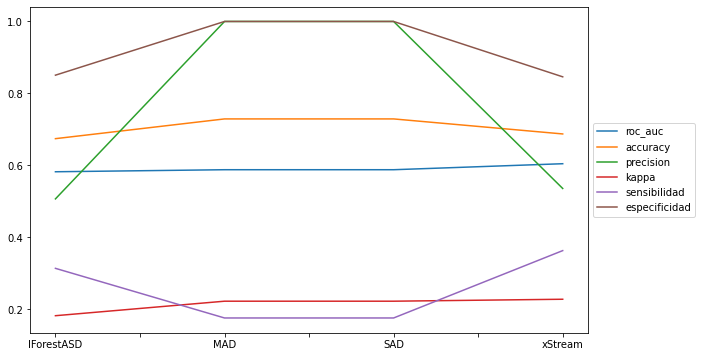

In [8]:
metricas_generales.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

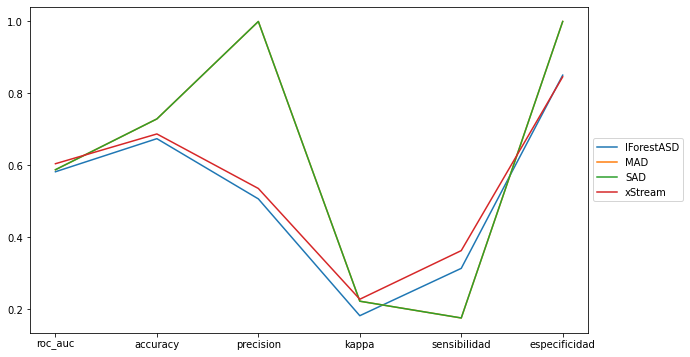

In [9]:
metricas_generales.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

## Sensibilidad por tipo de anomalía

In [10]:
sensibilidades = pd.DataFrame(index=metodos, columns=anomalias)

for metodo in metodos:
    for anomalia in anomalias:
        sensibilidades.loc[metodo,anomalia] = recall_score(pysad[anomalia], pysad[metodo])

sensibilidades

,Anomalia,Negro,CurvaCola,Congelado,Hum
IForestASD,0.313089,0.670978,0.246543,0.701072,0.939799
MAD,0.174999,0.731878,0.057839,0.904681,0.006689
SAD,0.174999,0.731878,0.057839,0.904681,0.006689
xStream,0.362427,0.839935,0.266318,0.897067,0.906355


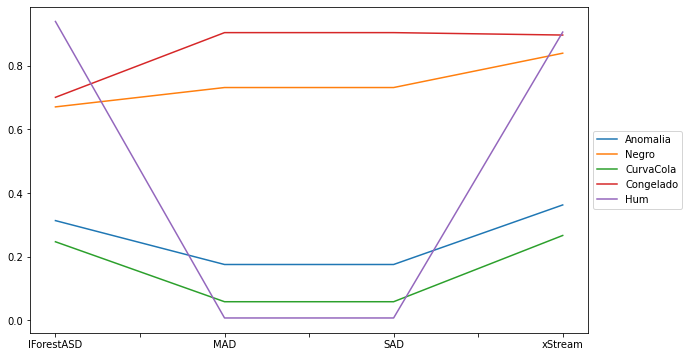

In [11]:
sensibilidades.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

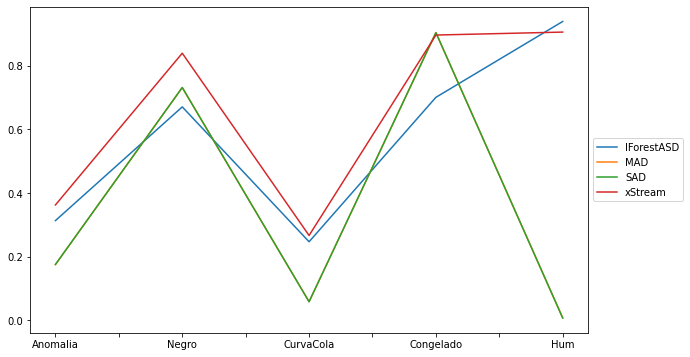

In [12]:
sensibilidades.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))